### Set up notebook

In [2]:
%load_ext autoreload
%autoreload 2

In [17]:
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
sns.set_theme(context="notebook")

In [19]:
nvals = 24*4

### PG&E B20

reference is ELEC_SCHEDS_B-20.pdf

schedule is for 2024 (most recent available).

In [20]:
datetime_index = pd.date_range(start='2019-01-01', end='2019-12-31 23:45:00', freq='15min')
df = pd.DataFrame(index=datetime_index)

In [21]:
summer = (6<=datetime_index.month) & (datetime_index.month<=9) # Between June and September included
winter = ~summer
peak = (16<=datetime_index.hour) & (datetime_index.hour<21) # Between 16:00 and 21:00, 21:00 excluded
partialPeak = ((14<=datetime_index.hour) & (datetime_index.hour<16)) | ((21<=datetime_index.hour) & (datetime_index.hour<23)) # Between 14:00 and 16:00, 16:00 excluded, or between 21:00 and 23:00, 23:00 excluded
superOffPeak = (9<=datetime_index.hour) & (datetime_index.hour<14) # Between 09:00 and 14:00, 14:00 excluded
superOffPeak = superOffPeak & (3<=datetime_index.month) & (datetime_index.month<=5) # Between March and May included

In [22]:
df['tou'] = ''
df.loc[summer & peak, 'tou'] = 'peakSummer'
df.loc[summer & partialPeak, 'tou'] = 'partialPeakSummer'
df.loc[summer & ~(peak | partialPeak), 'tou'] = 'offPeakSummer'
df.loc[winter & peak, 'tou'] = 'peakWinter'
df.loc[winter & superOffPeak, 'tou'] = 'superOffPeakWinter'
df.loc[winter & ~(peak | superOffPeak), 'tou'] = 'offPeakWinter'

In [23]:
# Primary voltage, $/kWh
df['energyPrice'] = 0.
df.loc[df['tou']=='peakSummer', 'energyPrice'] = 0.22451
df.loc[df['tou']=='partialPeakSummer', 'energyPrice'] = 0.17577
df.loc[df['tou']=='offPeakSummer', 'energyPrice'] = 0.14177
df.loc[df['tou']=='peakWinter', 'energyPrice'] = 0.19348
df.loc[df['tou']=='offPeakWinter', 'energyPrice'] = 0.14186
df.loc[df['tou']=='superOffPeakWinter', 'energyPrice'] = 0.06862

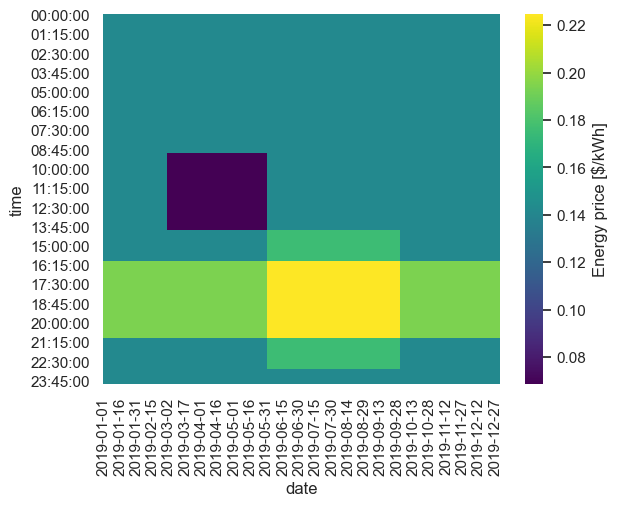

In [24]:
df['date'] = df.index.date
df['time'] = df.index.time
df_pivot = df.pivot_table(index='time', columns='date', values='energyPrice')
sns.heatmap(df_pivot, cmap='viridis', cbar_kws={'label': 'Energy price [$/kWh]'});

In [25]:
# Primary voltage, $/kW
df['peakDemandSummerPrice'] = 0.
df.loc[df['tou']=='peakSummer', 'peakDemandSummerPrice'] = 51.96
df['partialPeakDemandSummerPrice'] = 0.
df.loc[df['tou']=='partialPeakSummer', 'partialPeakDemandSummerPrice'] = 10.82
df['demandSummerPrice'] = 0.
df.loc[summer, 'demandSummerPrice'] = 37.14
df['peakDemandWinterPrice'] = 0.
df.loc[df['tou']=='peakWinter', 'peakDemandWinterPrice'] = 3.06
df['demandWinterPrice'] = 0.
df.loc[winter, 'demandWinterPrice'] = 37.14

In [26]:
savepath = Path('.') / "layouts" / "power_grid" / "power_price_B20.csv"
df.loc[:,['tou', 'energyPrice', 'peakDemandSummerPrice', 'partialPeakDemandSummerPrice', 'demandSummerPrice', 'peakDemandWinterPrice', 'demandWinterPrice']].to_csv(savepath)

## Gas

prices for 2022. It is the most recent available since 2023 has missing values

In [27]:
# https://www.eia.gov/dnav/ng/NG_PRI_SUM_A_EPG0_PIN_DMCF_M.htm
# 1000 cf of gas = 300 kWh
# data for 2022
datetime_index = pd.date_range(start='2019-01-01', end='2019-12-31 23:45:00', freq='15min')
df = pd.DataFrame(index=datetime_index)
df['energyPrice'] = 0.
df.loc['2019-01', 'energyPrice'] = 14.32/300
df.loc['2019-02', 'energyPrice'] = 13.04/300
df.loc['2019-03', 'energyPrice'] = 12.93/300
df.loc['2019-04', 'energyPrice'] = 11.70/300
df.loc['2019-05', 'energyPrice'] = 12.27/300
df.loc['2019-06', 'energyPrice'] = 14.20/300
df.loc['2019-07', 'energyPrice'] = 13.37/300
df.loc['2019-08', 'energyPrice'] = 14.36/300
df.loc['2019-09', 'energyPrice'] = 14.61/300
df.loc['2019-10', 'energyPrice'] = 13.28/300
df.loc['2019-11', 'energyPrice'] = 13.61/300
df.loc['2019-12', 'energyPrice'] = 16.96/300

In [28]:
savepath = Path('.') / "layouts" / "gas" / "gas_price.csv"
df.to_csv(savepath)